In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install histomicstk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 26.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of large-image-source-mapnik to determine which version is compati

In [3]:
! pip install histomicstk --find-links https://girder.github.io/large_image_wheels

Looking in links: https://girder.github.io/large_image_wheels
  Using cached histomicstk-1.3.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (645 kB)
  Using cached girder-client-3.2.3.tar.gz (21 kB)
  Preparing metadata (setup.py) ... done
  Using cached nimfa-1.4.0-py2.py3-none-any.whl (4.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 10.1 MB/s eta 0:00:00
  Using cached girder_slicer_cli_web-1.5.4-py2.py3-none-any.whl (98 kB)
  Using cached ctk_cli-1.5-py3-none-any.whl (10 kB)
  Using cached large_image-1.28.1-py3-none-any.whl (94 kB)
  Using cached large_image_converter-1.28.1-py3-none-any.whl (24 kB)
  Using cached diskcache-5.6.3-py3-none-any.whl (45 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached large_image_source_tiff-1.28.1-py3-none-any.whl (24 kB)
  Using cached tifftools-1.4.1-py3-none-any.whl (39 kB)
  Using cached palettable-3.3.3-py2.py3-none-any.whl (332 kB)
  Using cached large_image_source_pil-1.28.

In [4]:
import skimage.io as io
import numpy as np
import histomicstk.preprocessing.color_normalization as htk_cnorm
import cv2
import numpy as np

In [5]:
def deconvolution_stain_normalization(image):
    # Define the stain matrix
    stain_matrix = np.array([[0.650, 0.072, 0.268],  # Hematoxylin
                             [0.704, 0.990, 0.570],  # Eosin
                             [0.286, 0.105, 0.776]])  # DAB

    # Normalize the stain matrix
    stain_matrix_norm = stain_matrix / np.linalg.norm(stain_matrix, axis=0)

    # Split the image into color channels
    b, g, r = cv2.split(image)

    # Convert the image to float32
    b = b.astype(np.float32)
    g = g.astype(np.float32)
    r = r.astype(np.float32)

    # Merge the channels into a 3D matrix
    image_matrix = np.stack([b, g, r], axis=2)

    # Normalize the image matrix
    image_matrix_norm = image_matrix / 255.0

    # Perform the stain color normalization
    transformed_matrix = np.dot(image_matrix_norm, stain_matrix_norm)

    # Scale the transformed matrix to 0-255 range
    transformed_matrix *= 255.0

    # Split the transformed matrix into color channels
    b_norm, g_norm, r_norm = cv2.split(transformed_matrix)

    # Convert the normalized channels to uint8
    b_norm = b_norm.astype(np.uint8)
    g_norm = g_norm.astype(np.uint8)
    r_norm = r_norm.astype(np.uint8)

    # Merge the normalized channels
    normalized_image = cv2.merge([b_norm, g_norm, r_norm])

    return normalized_image

In [6]:
from google.colab.patches import cv2_imshow

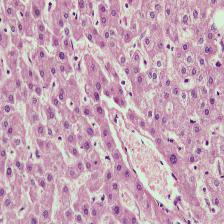

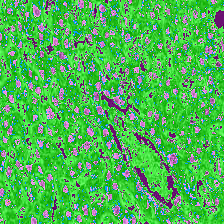

In [7]:
input_image = cv2.imread('/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_images/Non_cancerous/f10.jpeg')

# Apply deconvolution stain color normalization
normalized_image = deconvolution_stain_normalization(input_image)

# Display the original and normalized images
cv2_imshow(input_image)
cv2_imshow(normalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
print(normalized_image)

[[[ 34 205  33]
  [101 252 101]
  [ 99 250 102]
  ...
  [ 26 189  30]
  [ 13 178  19]
  [ 37 194  42]]

 [[ 45 213  45]
  [ 88 243  88]
  [ 81 237  84]
  ...
  [ 32 193  37]
  [ 16 180  22]
  [  4 170  10]]

 [[ 71 232  71]
  [ 93 246  92]
  [ 88 241  90]
  ...
  [ 24 186  31]
  [ 16 178  24]
  [251 162   4]]

 ...

 [[237 156 238]
  [  2 173   3]
  [  4 177   4]
  ...
  [  7 179  16]
  [ 18 184  26]
  [ 33 194  41]]

 [[ 24 186  24]
  [ 54 209  53]
  [ 33 197  32]
  ...
  [ 21 190  29]
  [ 57 212  66]
  [ 73 223  82]]

 [[ 64 214  63]
  [102 243 100]
  [ 66 220  65]
  ...
  [ 31 197  39]
  [ 82 231  91]
  [ 98 240 107]]]


In [9]:
#https://github.com/nikhilroxtomar/UNet-Segmentation-in-Keras-TensorFlow/blob/master/unet-segmentation.ipynb
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [10]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [11]:
image_size=128

In [12]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))

    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8

    bn = bottleneck(p4, f[4])

    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128

    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [13]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [14]:
model.load_weights('/content/drive/MyDrive/Hepatoma-Staging-Project/Weights/UnetW_50_normalised.h5')

In [15]:
print(normalized_image.shape)

(224, 224, 3)


In [16]:
image = cv2.resize(normalized_image, (image_size, image_size))

In [17]:
print(image.shape)

(128, 128, 3)


In [18]:
image = image/255.0

In [19]:
expanded_array = np.expand_dims(image, axis=0)

In [20]:
print(expanded_array.shape)

(1, 128, 128, 3)


In [21]:
result = model.predict(expanded_array)

result = result > 0.3

1/1 [==============================] - 1s 509ms/step


In [22]:
print(result.shape)

(1, 128, 128, 1)


In [23]:
result[0].shape

(128, 128, 1)

In [24]:
res = np.squeeze(result[0])

In [25]:
print(res.shape)

(128, 128)


In [26]:
print(result[0]*255)

[[[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 ...

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[255]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]]


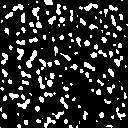

In [27]:
cv2_imshow(result[0]*255)

In [28]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.1 MB/

In [29]:
import gradio as gr

In [30]:
from PIL import Image

In [31]:
def segment_mask(image):
  image = cv2.resize(normalized_image, (image_size, image_size))
  image = image/255.0
  expanded_array = np.expand_dims(image, axis=0)
  result = model.predict(expanded_array)

  result = result > 0.3
  grayscale_image = (result[0] * 255).astype(np.uint8)
  #print(grayscale_image)
  return grayscale_image

In [32]:
def predict_input_image(image):
  norm=deconvolution_stain_normalization(image)
  #norm=Image.fromarray(norm.astype(np.uint8))
  res=segment_mask(norm)
  #res=Image.fromarray(res.astype(np.uint8))
  #print(res)
  res=np.squeeze(res)
  print(res)
  return norm,res

In [33]:
ip, re=predict_input_image(input_image)

1/1 [==============================] - 0s 119ms/step
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]


In [ ]:
# Define the Gradio interface
interface = gr.Interface(
    fn=predict_input_image,
    inputs=gr.components.Image(),
    outputs=[
        gr.components.Image(label="Stain Colour Normalised",width=200, height=200),
        gr.components.Image(label="Segmented Mask",type="numpy",width=200, height=200)

    ],
    title="HCC - Demo",
    description="The following interface shows the Stage 1 Pipeline of out project involving solving Class imbalance, Stain Colour Normalizatiom and Nuclei Mask Segementation",

)

interface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2125e9d3986831e088.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 95ms/step
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]
1/1 [==============================] - 0s 57ms/step
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]
1/1 [==============================] - 0s 57ms/step
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]
1/1 [==============================] - 0s 56ms/step
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]
